In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [2]:
data_dir = 'dataset/'

In [3]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 744 images belonging to 2 classes.


In [5]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 186 images belonging to 2 classes.


In [6]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 [==============================] - 22s 0us/step


In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [10]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
23/23 [==============================] - 35s 881ms/step - loss: 2.4853 - accuracy: 0.8244 - val_loss: 0.9466 - val_accuracy: 0.9500
Epoch 2/10
23/23 [==============================] - 13s 544ms/step - loss: 1.1665 - accuracy: 0.9340 - val_loss: 0.5448 - val_accuracy: 0.9563
Epoch 3/10
23/23 [==============================] - 13s 563ms/step - loss: 0.6767 - accuracy: 0.9579 - val_loss: 0.3818 - val_accuracy: 0.9750
Epoch 4/10
23/23 [==============================] - 12s 536ms/step - loss: 0.5290 - accuracy: 0.9649 - val_loss: 0.6821 - val_accuracy: 0.9688
Epoch 5/10
23/23 [==============================] - 13s 563ms/step - loss: 0.4862 - accuracy: 0.9688 - val_loss: 0.3847 - val_accuracy: 0.9750
Epoch 6/10
23/23 [==============================] - 12s 536ms/step - loss: 0.2534 - accuracy: 0.9761 - val_loss: 0.0469 - val_accuracy: 0.9875
Epoch 7/10
23/23 [==============================] - 13s 551ms/step - loss: 0.4951 - accuracy: 0.9719 - val_loss: 0.2130 - val_accuracy: 0.9875

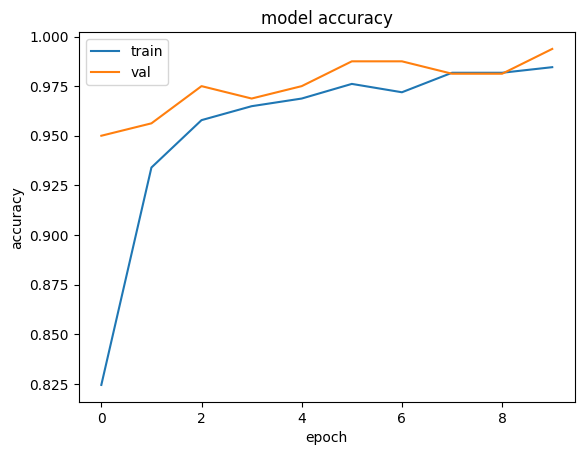

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
model.save('VGG16_model.h5')

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     